<a href="https://colab.research.google.com/github/evmpython/relevo/blob/main/CAT016_Aula_01_plota_relevo_FINAL_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Disciplina CAT016** - Radares: Uso e Aplicações em Ciências Atmosféricas
## **Aula Prática - 1:** $\underline{Plotando\ Mapa\ de\ Relevo}$
---
- **OBJETIVO:** Nesta aula prática aprenderemos como gerar um mapa de relevo para uma determinada região.   

---

- **DADOS UTILIZADOS:** São utilizados dados de relevo do GEBCO_2021 Grid: 
    1. Acessar o [site](https://download.gebco.net/) do dado de relevo  
    2. Selecionar a região de interesse 
    3. Escolher o formato **GeoTIFF** - Opção **Grid**
    4. Clicar em **Add to basket**, seguido por **View basket** e em **Download your data**
    4. Baixar a figura e inserir no drive, no mesmo local do código
---

- **METODOLOGIA:** Nessa aula realizaremos os seguintes procedimentos:

    1.   **Instação** das bibliotecas adicionais
    2.   **Importação** das biblotecas
    3.   Montagem o **drive online**
    4.   **Download** dos shapefiles dos Estados brasileiros 
    5.   **Leitura** do dado de relevo
    6.   Plotar **mapa de relevo**
    7.   **Salvar** a figura 
    
---
**OBSERVAÇÕES IMPORTANTES**: 
* 1. Para  maioria dos alunos esse é o primeiro contato com o Python. Então fiquem tranquilos, será explicado os comandos passo-a-passo. 
---
- **Realizado por:** Enrique V. Mattos - 25/12/2021
- **Atualizado por:** Enrique V. Mattos e Raquel Gonçalves Pereira - 14/02/2022


### **Exemplo da Figura que produziremos nessa aula:**

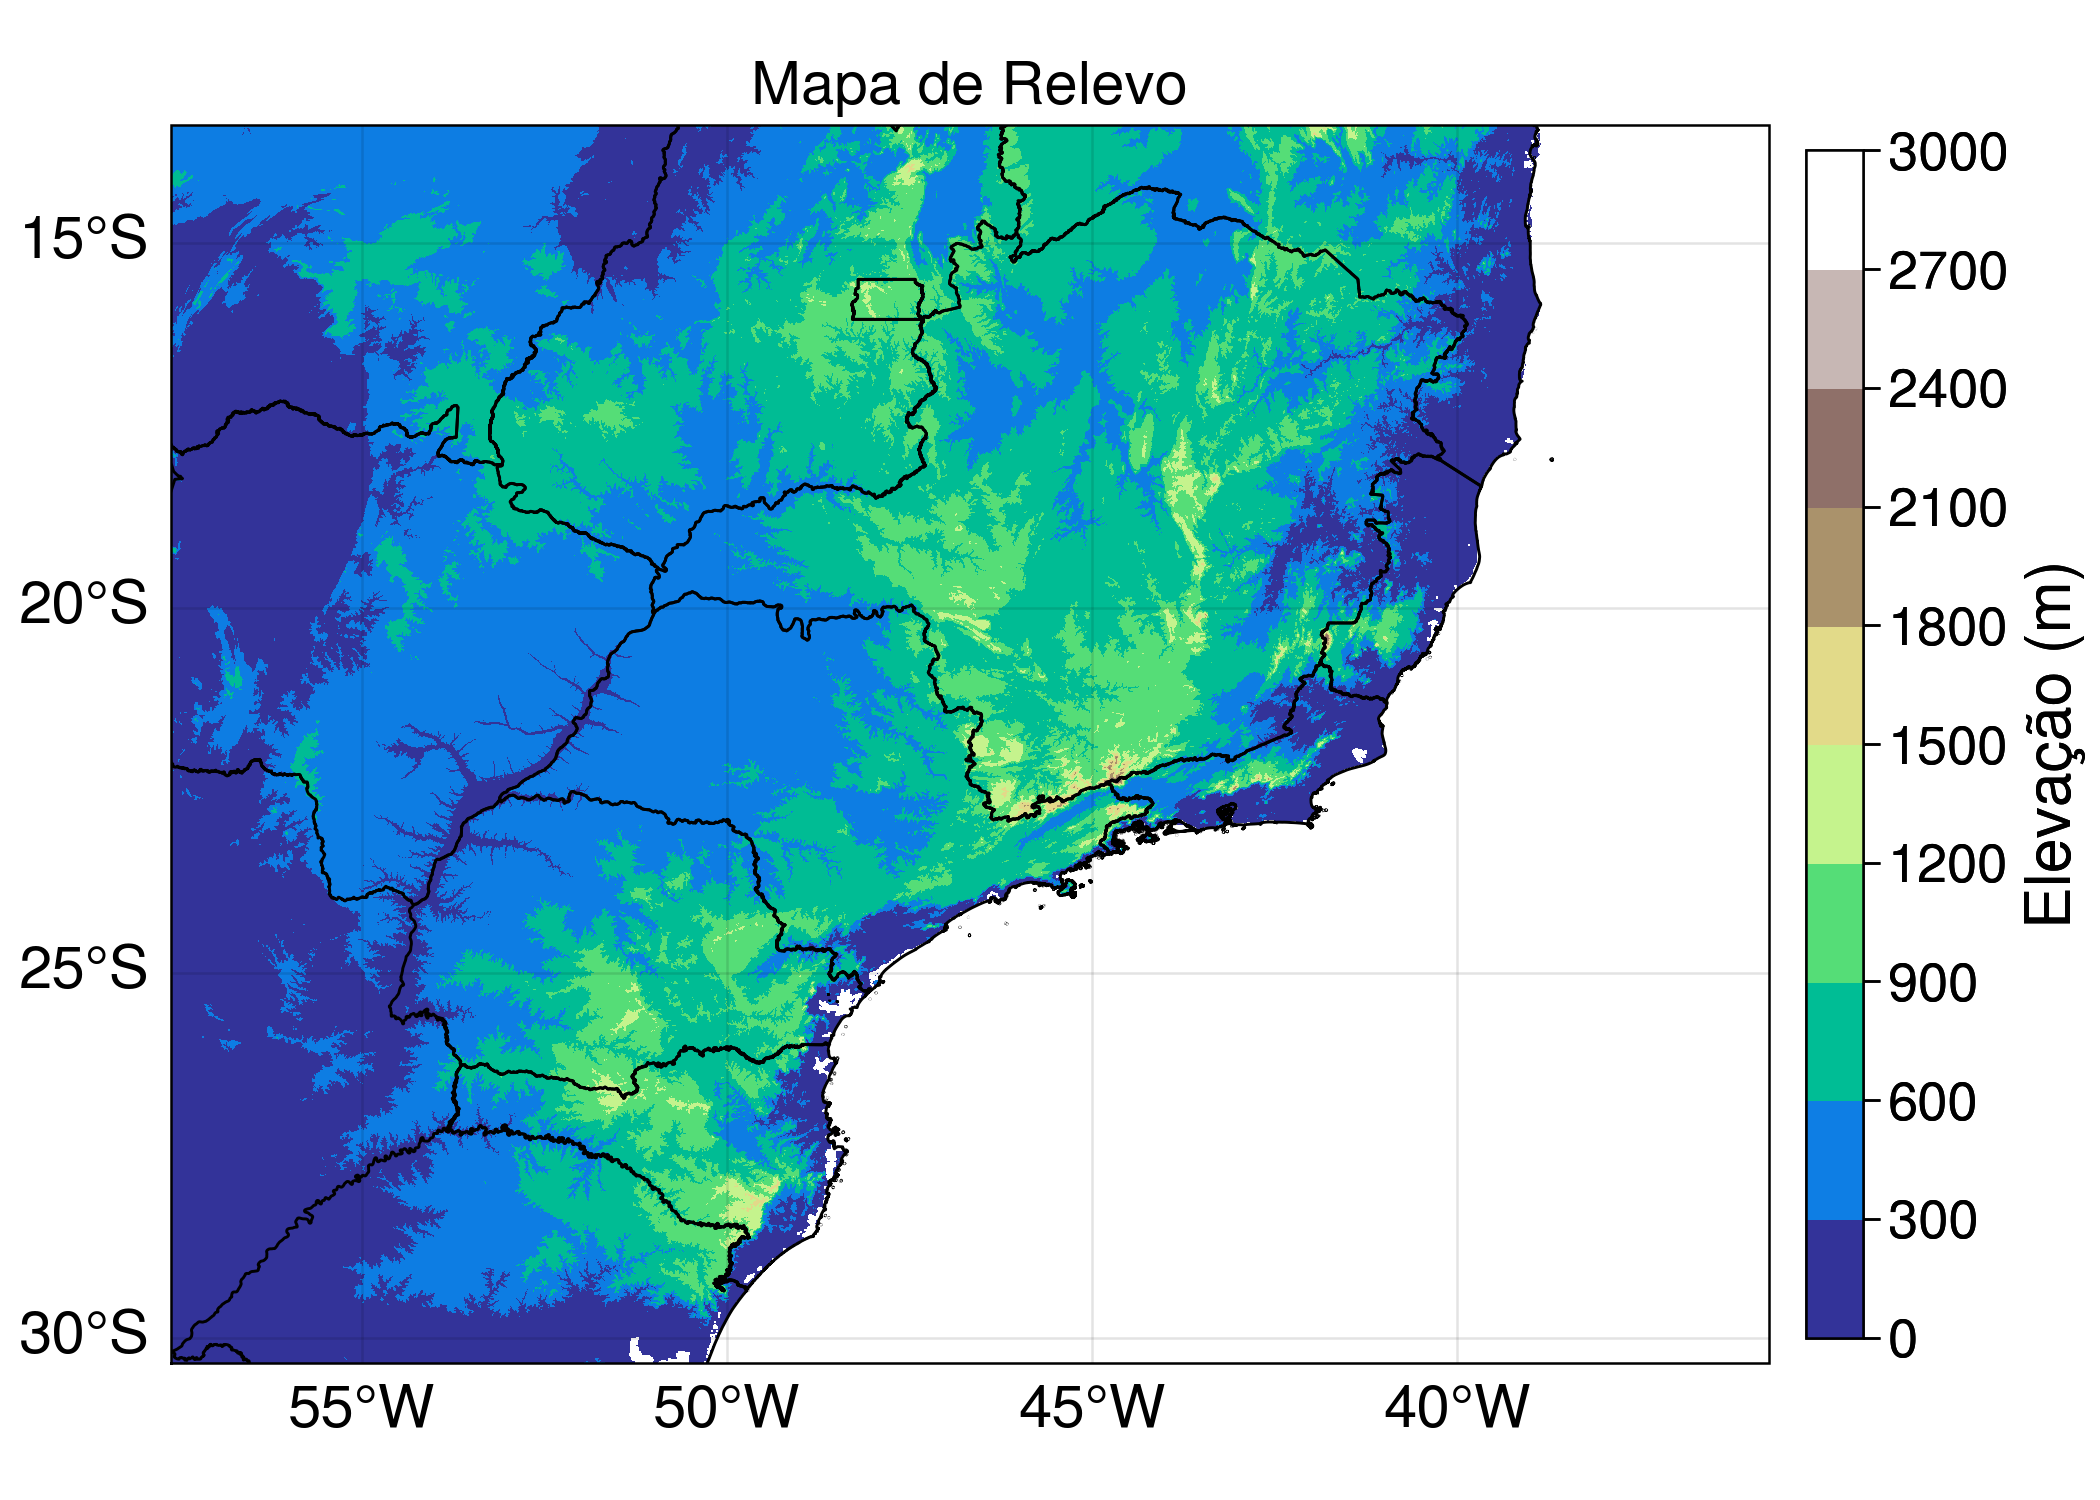

# **Instala bibliotecas adicionais**

In [ ]:
# Instalando o cartopy (usado para gerar Mapas)   
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install --no-binary shapely shapely --force
!pip install cartopy

# Instalando o proplot (usado para gerar Mapas também)
!pip install proplot==0.6.4

# Instalando o Salem (usado para mascarar regiões)
!pip install rasterio
!pip install pyproj

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (105 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 155320 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2)

# **Importa bibliotecas**

In [ ]:
import numpy as np                          # Biblioteca para trabalhar com matrizes 
import proplot as plot                      # Biblioteca para gerar figuras 
import os                                   # Biblioteca para acessar o sistema operacional 
import cartopy.crs as ccrs                  # Biblioteca para trabalhar com projeções de mapas 
import cartopy.io.shapereader as shpreader  # Biblioteca para ler arquivos shapefiles 
import rasterio as rio                      # Biblioteca para trabalhar com arquivos raster

# vamos ignorar vários avisos
import warnings
warnings.filterwarnings('ignore')

# **Monta o drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **###MUDANÇAS AQUI###**:
- Insira o **caminho + nome** do arquivo que foi baixado e inserido no drive 

In [ ]:
filename = 'gebco_2021_n-15.0_s-30.0_w-55.0_e-40.0.tif'

dir = os.path.dirname(filename)

# **Download de informações auxiliares**

In [ ]:
# Criando os diretórios de entrada e saida
os.makedirs('input', exist_ok=True)
os.makedirs('output', exist_ok=True)
os.makedirs('arquivos_auxiliares', exist_ok=True)

# Baixando o arquivo shapefile do Brasil
# Os dados de shapefile aqui: https://www.ibge.gov.br/geociencias/organizacao-do-territorio/estrutura-territorial/15774-malhas.html?=&t=downloads
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip -P /content/arquivos_auxiliares/
print('\n')

# Descomprimindo o arquivo 
!unzip -o /content/arquivos_auxiliares/br_unidades_da_federacao.zip -d /content/arquivos_auxiliares/
print('\n')

--2022-03-04 14:06:27--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



Archive:  /content/arquivos_auxiliares/br_unidades_da_federacao.zip
 extracting: /content/arquivos_auxiliares/BR_UF_2019.cpg  
  inflating: /content/arquivos_auxiliares/BR_UF_2019.dbf  
  inflating: /content/arquivos_auxiliares/BR_UF_2019.prj  
  inflating: /content/arquivos_auxiliares/BR_UF_2019.shp  
  inflating: /content/arquivos_auxiliares/BR_UF_2019.shx  




# **Lendo o arquivo**

In [ ]:
# Abrindo arquivo tif. É bom abrir com with pq garante que o arquivo vai ser fechado
# Após a identação. Pode abrir diretamente com tif = rio.open('arq.tif')

with rio.open(filename) as tif:
    
    # Limites da imagem
    lonmin, latmin, lonmax, latmax = tif.bounds
    
    # Informações do arquivo no formato de dicionario dê um print(meta) para ver mais coisas
    meta = tif.meta
    
    # Resolução do arquivo
    res = tif.res
    
    #data = tif.indexes
    # Lê a matriz
    data = tif.read(1)

In [ ]:
filename

'/content/drive/MyDrive/PYHTON/00_GITHUB/relevo/gebco_2021_n-15.0_s-30.0_w-55.0_e-40.0.tif'

# **Plota figura de relevo**

**Visualizando o metadado**

In [ ]:
print(meta)

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32767.0, 'width': 3600, 'height': 3600, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0041666666666666675, 0.0, -55.0,
       0.0, -0.0041666666666666675, -14.999999999999998)}


**Mascarando os dados Undef**

In [ ]:
data = np.where(data < 0, -32767.0, data)
data = np.ma.masked_equal(data, meta['nodata'])

**Imprimindo na tela as latitudes, longitudes e resolução espacial do dado**

In [ ]:
print(lonmin, lonmax)
print(latmin, latmax)
print(res[0]*100*1000, res[1]*100*1000, 'metros')
print(data.min(), data.max())

-55.0 -40.0
-30.0 -14.999999999999998
416.66666666666674 416.66666666666674 metros
0.0 2762.0


**Plotando a figura**

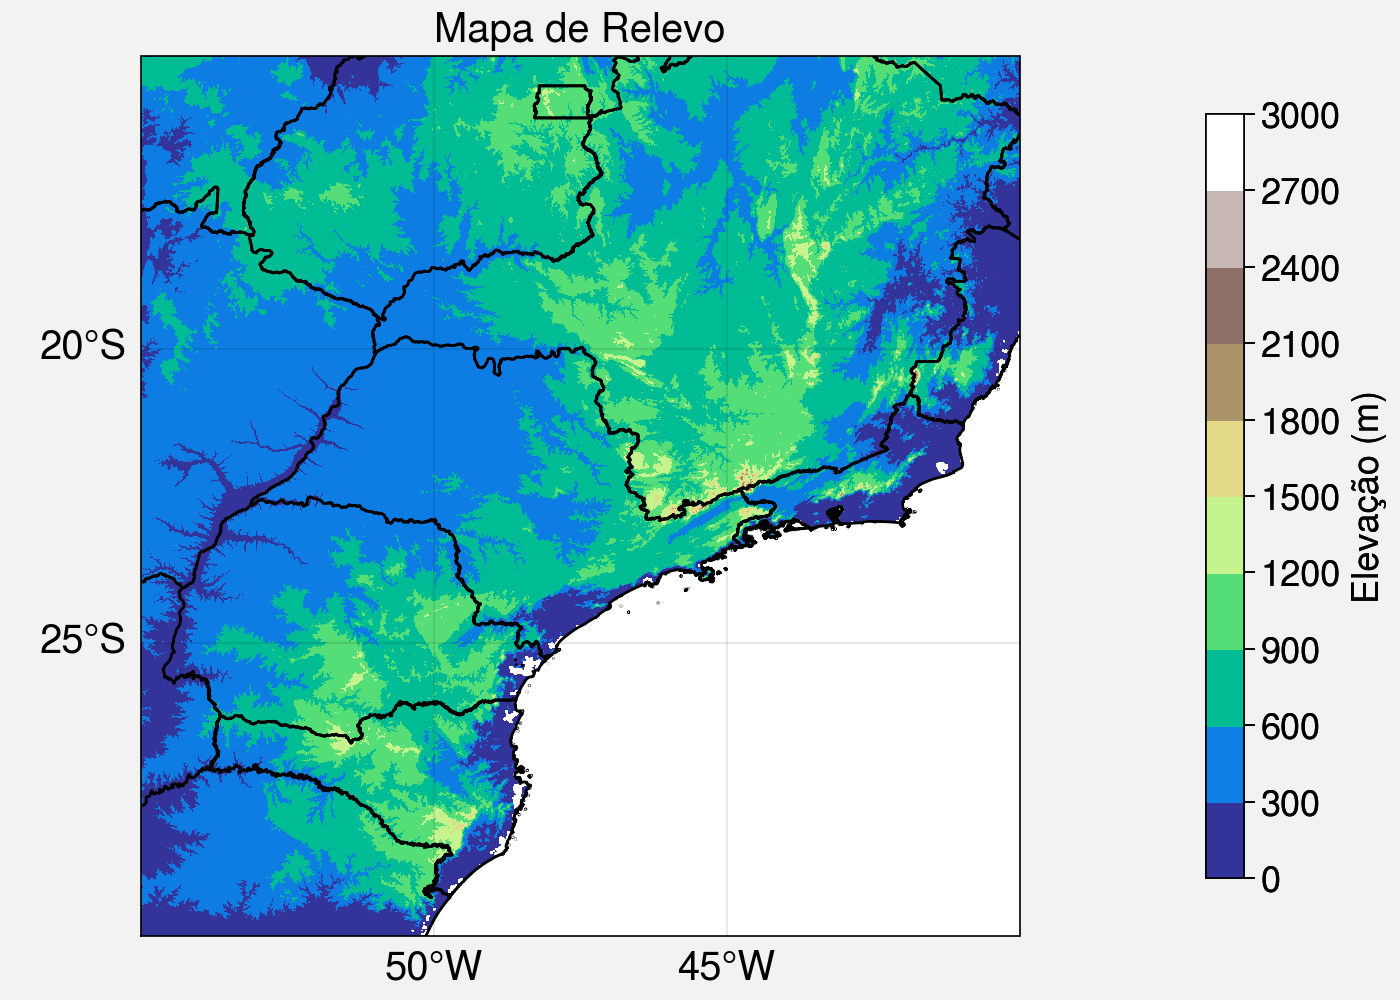

In [ ]:
# moldura da figura
fig, ax = plot.subplots(figsize=(7,5), tight=True, proj='pcarree')

# formatação dos eixos da figura
ax.format(coast=False, borders=False, innerborders=False, labels=True, latlines=5, lonlines=5, 
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax), title=f'Mapa de Relevo',
          small='20px', large='20px')

# plota figura
map1 = ax.imshow(data, extent=[lonmin, lonmax, latmin, latmax], cmap='terrain', vmin=0)

# Adiciona shapeFile do Brasil
shapefile=list(shpreader.Reader('/content/arquivos_auxiliares/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=1.0)

# plota barra de cores da figura
fig.colorbar(map1, loc='right', label='Elevação (m)', length=0.87, ticklabelsize=13, labelsize=13)

# Salva figura
fig.save(f'{dir}/Figura_relevo.png', dpi=300)

# Exibe na tela
plot.show()